<a href="https://colab.research.google.com/github/love-bees/dataHacker/blob/master/07_kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#007 kNN - k Nearest Neighbors

U našem narodu dobro je poznaka izreka “S kim si onakav si”. Dobro je poznata i misao da mi, kao pojedinci, predstavljamo “sredinu, od petoro ljudi sa kojima provodimo najviše vremena”. Slagali se sa ovim ili ne, osnovna ideja ovih poruka predstavlja ideju za algoritam kNN. k Nearest Neighbors za svaki element iz skupa podataka prvo definiše razdaljinu od susednih elemenata. Ta razdaljina može da predstavlja rastojanje između dve tačke. Parametar k biramo mi i on utiče na broj suseda za jednu tačku koju ispitujemo u njegovoj okolini.

Definišimo dve klase elemenata tako što ćemo ručno napraviti elemente klase. Neka elementi klase 1 budu tačke koordinatnog sistema sa pozitivnim koeficijentima, a elementi klase 2 sa negativnim. 

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
X = np.array([[3,2],[2,4],[3,3],[1,4],[2,2],[-2,-3],[-3,-4],[-5,-2],[-1,-2],[-3,-3]])

In [0]:
y = np.array([1,1,1,1,1,2,2,2,2,2,])

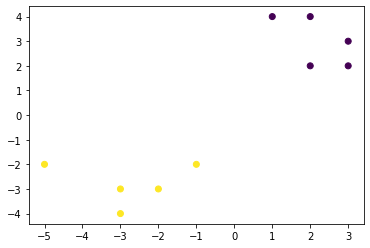

In [4]:
plt.scatter(X[:,0],X[:,1],c=y);

 Na ovom primeru prikazaćemo novi algoritam za klasifikaciju. Njegovo ime je kNN – k Nearest Neighbours. Na sledećoj slici prikazan je osnovni način rada kNN algoritma.


 Zamislimo da dobijemo novu tačku (2,1) koja predstavlja test skup. Naš zadatak je da odredimo da li ona pripada klasi 1 ili klasi 2. Parametar k kNN algoritma je podešen na vrednost 3. Uglavnom se biraju neparni brojevi, a videćemo ubrzo i zašto. Pronađimo 3 najbliže tačke našoj test tački. Najlakše je da ovo ilustrujemo i da vizuelno pronađemo 3 najbliže tačke.

In [0]:
x_test_1 = np.array ([[2,1]])

In [6]:
x_test_1.shape

(1, 2)

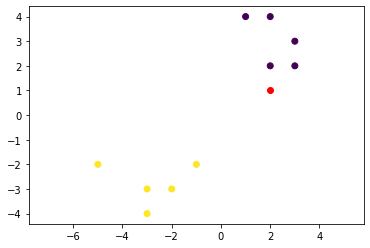

In [7]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.scatter(x_test_1[0,0],x_test_1[0,1],c='r')
# s obzirom na to da računamo razdaljinu između tački, dobra je praksa da se ose podese na 'equal' kako bi  
# iste dužine odgovarale i na x i na y osi. 
plt.axis('equal');


 Naša test tačka je “okružena” elementima klase 1, tj. tri njoj najbliže tačke imaju klasu 1. kNN algoritam će ovo izbrojati i primenit tzv. majority vote: 3-0 u korsit klase 1. Stoga će naša nova tačka biti dodeljena klasi 1. Proverimo sam tok kada primenimo kNN algoritam koji se nalazi u biblioteci sklearn.

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
# definišemo instancu kNN, a za k biramo vrednost 3. To je prosleđeno samoj inicijalizaciji objekta kao parametar n_neighbors
kNN = KNeighborsClassifier(n_neighbors=3)

In [10]:
# prosleđujemo ulazne podatke našem algoritmu. 
# kNN je zapravo jedan od retkih algoritama koji nakon što mu se proslede ulazni podaci vrši samo prihatanje podataka
kNN.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [0]:
# sam algoritam radiće tek kada mu se dodeli test skup i kada pozovemo naredbu predict
# algoritam prvo pronalazi 3 (odnosno k) najbliže tačke, a zatim proverava koje su njihove klase i onda vrši "majority vote"

In [12]:
kNN.predict(x_test_1.reshape(1,-1))

array([1])

In [0]:
# kNN primenjen na iris dataset

In [0]:
# učitajmo sam iris dataset
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [0]:
# podelimo sada dataset na trening i skup "ručno"
# Ovaj proces daće nam malo više intuicije kako se zapravo vrši ova podela i kako to možemo sami uraditi 
# bez korišćenja naredbe train_test_split()

In [16]:
# kreirajmo sve indekse za naš skup koji ima 150 elemenata
svi_indeksi = np.arange(150)
print(svi_indeksi)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149]


Da bismo na slučajan način birali cvetove iz sva tri skupa možemo da se poslužimo naredbom .random.shuffle(). Umesto da direktno indeksiramo koje elemente ćemo koristiti u trening a koje u test skupu, možemo našu uređenu listu indeksa da izmešamo. Ovo upravo činimo pomenutom naredbom .random.shuffle(niz) koja vrši proizvoljnu permutaciju nad nizom niz.

In [18]:
# shuffle mozemo pronaći u biblioteci random
primer = np.arange(5)
print(primer)
np.random.shuffle(primer)
print(primer)


[0 1 2 3 4]
[0 4 2 1 3]


Vidimo kako se elementi u drugoj listi stalno menjaju. Uradimo sada slično za naš iris skup podataka. 

In [19]:
#promešajmo sada sve indekse
np.random.shuffle(svi_indeksi)
print (svi_indeksi)

[ 58  27 141  92 146 108  21 118  44 115  97  88  67 132 117  89 112 129
  61  50  84 103  12  76  74  20 114  40  99 131  63  17  59 149  16  54
   9 136 138  93  56 142 130  95  22 102  34   5 140  24  60  35 116   2
 106  57  70  85 107 139  96   0 120  11  23  80  65  87   7 101  86  98
 111 128  68  37   6 122 143 121  45  43  26  32  14   3  30 148  41 144
 127 124  73  77  53  19  46  79  83 125  69  48  64 135  55   8 133  18
  36 110  39 145 123  33  71  72  47  38  10  13 147  25  31  75 119  90
  51  42  29   1   4  81  82  28 137  15 126 104  52 105  49 109 113  94
  66  78  91 100  62 134]


Ovo je upravo ono što smo tražili. Indeksi su raspoređeni na potpuno proizvoljan način. Prvih 80% podataka iskoristićemo za pravljenje našeg trening dataset-a. Preostalih 20% koristićemo za pravljenje test skupa.

In [0]:
indeksi_trening = svi_indeksi[0: 120 ] # 120 = 0.80 * 150
X_trening = X[indeksi_trening,:]
y_trening = y [indeksi_trening]

In [0]:
indeksi_test = svi_indeksi [120:]
X_test = X[indeksi_test,:]
y_test = y [indeksi_test]

In [0]:
# Obučimo sada naš kNN klasifikator. Dogovorno uzimamo da je k = 5

In [23]:
kNN=KNeighborsClassifier(n_neighbors=5)
kNN.fit(X_trening,y_trening)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_knn_predicted = kNN.predict(X_test)

In [25]:
sum(y_knn_predicted == y_test) / len(y_test)

0.9666666666666667

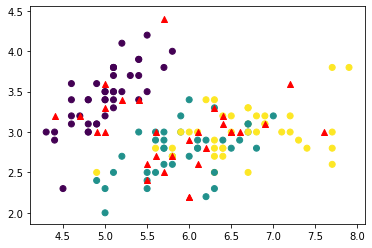

In [26]:
plt.scatter(X_trening[:,0], X_trening[:,1], c=y_trening)
plt.scatter(X_test[:,0], X_test[:,1],marker = '^', c='r');

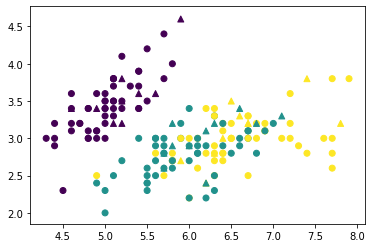

In [27]:
plt.scatter(X_trening[:,0], X_trening[:,1], c=y_trening)
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
# Elementi test skupa prikazani su kao trouglovi. 
plt.scatter(X_test[:,0]+0.2, X_test[:,1]+0.2,marker='^', c=y_test);

Jedini parametar koji algoritam kNN prihvata kao ulazni podatak jeste n_neighours, odnosno k. Uobičajne vrednosti koje se uzimaju za ispitivanje različitih vrednosti k su {3, 5, 7, 9, 11, 15 …}. Radi vežbe promenite sami parametre n_neighbours i pratite kolika se tačnost postiže na test skupu. Pre nego što završimo, pogledajmo još kako možemo izvršiti vizuelizaciju iris dataset-a. Pored biblioteke matplotlib, često se koristi i biblioteka seaborn. Seaborn omogućava praveljenje veoma lepih i korisnih grafika za Exploratory Data Analysis – EDA.

In [0]:
import seaborn as sns
from pandas import DataFrame

In [0]:
sns.set()
# ove tri naredbe od naše matrice prave DataFrame. 
# ovo je opisano u postu #009. Za sada ne brinite ako nešto izgleda nejasno. 
# Samo se treba fokusirati na rezultat koji dobijete u vizuelizaciji. 
iris = DataFrame(data=X)
iris["Class"] = y
iris.columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Class']

In [30]:
# ovo je naša tabela iris, a dodali smo joj kolonu Class
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


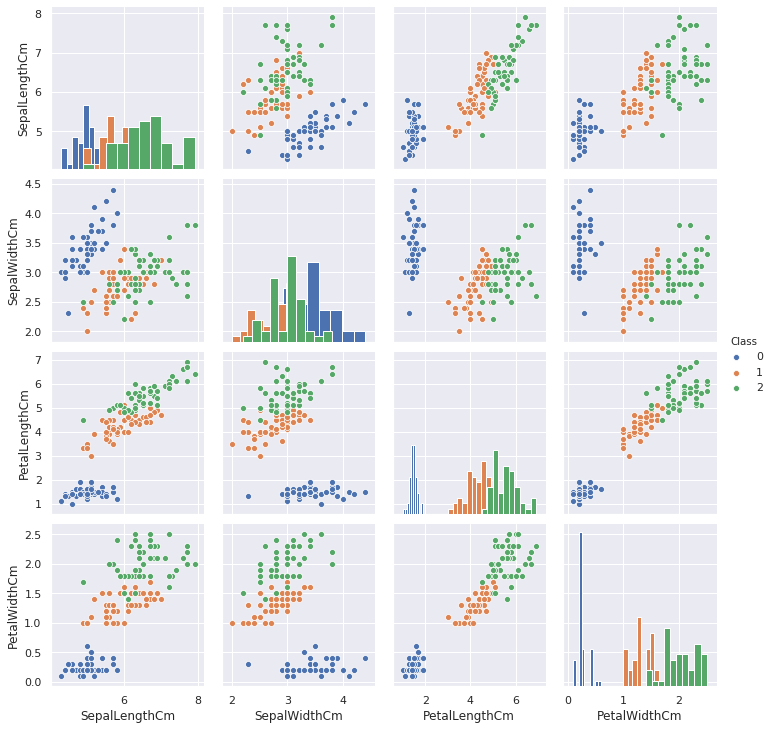

In [31]:
# Ovom naredbom možemo sada da iscrtamo naš dataset na nekoliko načina
# primetimo da nam svaki od ovih grafika pruža neku novu vrstu informacija
sns.pairplot(iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Class']],hue='Class', diag_kind="hist");